In [1]:
# Import libraries
import random
import os
import numpy as np 
import pandas as pd 
import requests
import pandas_datareader as web

# Date
import datetime as dt
from datetime import date, timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,explained_variance_score, r2_score , mean_absolute_percentage_error
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from sklearn.ensemble import GradientBoostingRegressor
from keras.layers import LSTM, Dense, Dropout
from sklearn.base import BaseEstimator
from tensorflow.keras.layers import SimpleRNN


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/commmm5/commodities_5mnFF.csv')
display(df)

,CL1Dates,CL1Open,CL1Close,CL1Value,CL1Volume,NG1Dates,NG1Open,NG1Close,NG1Value,NG1Volume,...,CT1Dates,CT1Open,CT1Close,CT1Value,CT1Volume,LC1Dates,LC1Open,LC1Close,LC1Value,LC1Volume
0,5/31/2023 23:05,67.65,67.58,6287.77,93,5/31/2023 23:05,2.257,2.259,142.248,63.0,...,6/1/2023 2:05,83.68,83.92,3769.90,45.0,6/1/2023 14:35,169.200,169.275,42137.199,249.0
1,5/31/2023 23:10,67.58,67.57,17089.73,253,5/31/2023 23:10,2.258,2.258,121.879,54.0,...,6/1/2023 2:10,83.85,83.91,251.57,3.0,6/1/2023 14:40,169.250,169.250,33680.449,199.0
2,5/31/2023 23:15,67.57,67.54,5335.84,79,5/31/2023 23:15,2.257,2.257,110.578,49.0,...,6/1/2023 2:15,83.93,83.99,251.90,3.0,6/1/2023 14:45,169.275,169.325,39617.148,234.0
3,5/31/2023 23:20,67.51,67.55,5132.33,76,5/31/2023 23:20,2.255,2.256,36.088,16.0,...,6/1/2023 2:20,83.92,83.92,83.92,1.0,6/1/2023 14:50,169.350,169.325,20149.150,119.0
4,5/31/2023 23:25,67.55,67.52,2701.65,40,5/31/2023 23:25,2.256,2.255,42.858,19.0,...,6/1/2023 2:25,83.92,83.91,251.75,3.0,6/1/2023 14:55,169.325,169.425,41496.199,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36792,12/14/2023 14:55,71.39,71.49,107288.04,1502,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36793,12/14/2023 15:00,71.50,71.54,285467.16,3990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36794,12/14/2023 15:05,71.54,71.62,108174.64,1511,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36795,12/14/2023 15:10,71.62,71.62,193266.97,2697,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['CL1Dates'] = pd.to_datetime(df['CL1Dates'], format='%m/%d/%Y %H:%M')
df['NG1Dates'] = pd.to_datetime(df['NG1Dates'], format='%m/%d/%Y %H:%M')
df['HO1Dates'] = pd.to_datetime(df['HO1Dates'], format='%m/%d/%Y %H:%M')
df['WDates'] = pd.to_datetime(df['WDates'], format='%m/%d/%Y %H:%M')
df['CDates'] = pd.to_datetime(df['CDates'], format='%m/%d/%Y %H:%M')
df['SDates'] = pd.to_datetime(df['SDates'], format='%m/%d/%Y %H:%M')
df['BO1Dates'] = pd.to_datetime(df['BO1Dates'], format='%m/%d/%Y %H:%M')
df['HG1Dates'] = pd.to_datetime(df['HG1Dates'], format='%m/%d/%Y %H:%M')
df['GC1Dates'] = pd.to_datetime(df['GC1Dates'], format='%m/%d/%Y %H:%M')
df['CT1Dates'] = pd.to_datetime(df['CT1Dates'], format='%m/%d/%Y %H:%M')
df['LC1Dates'] = pd.to_datetime(df['LC1Dates'], format='%m/%d/%Y %H:%M')


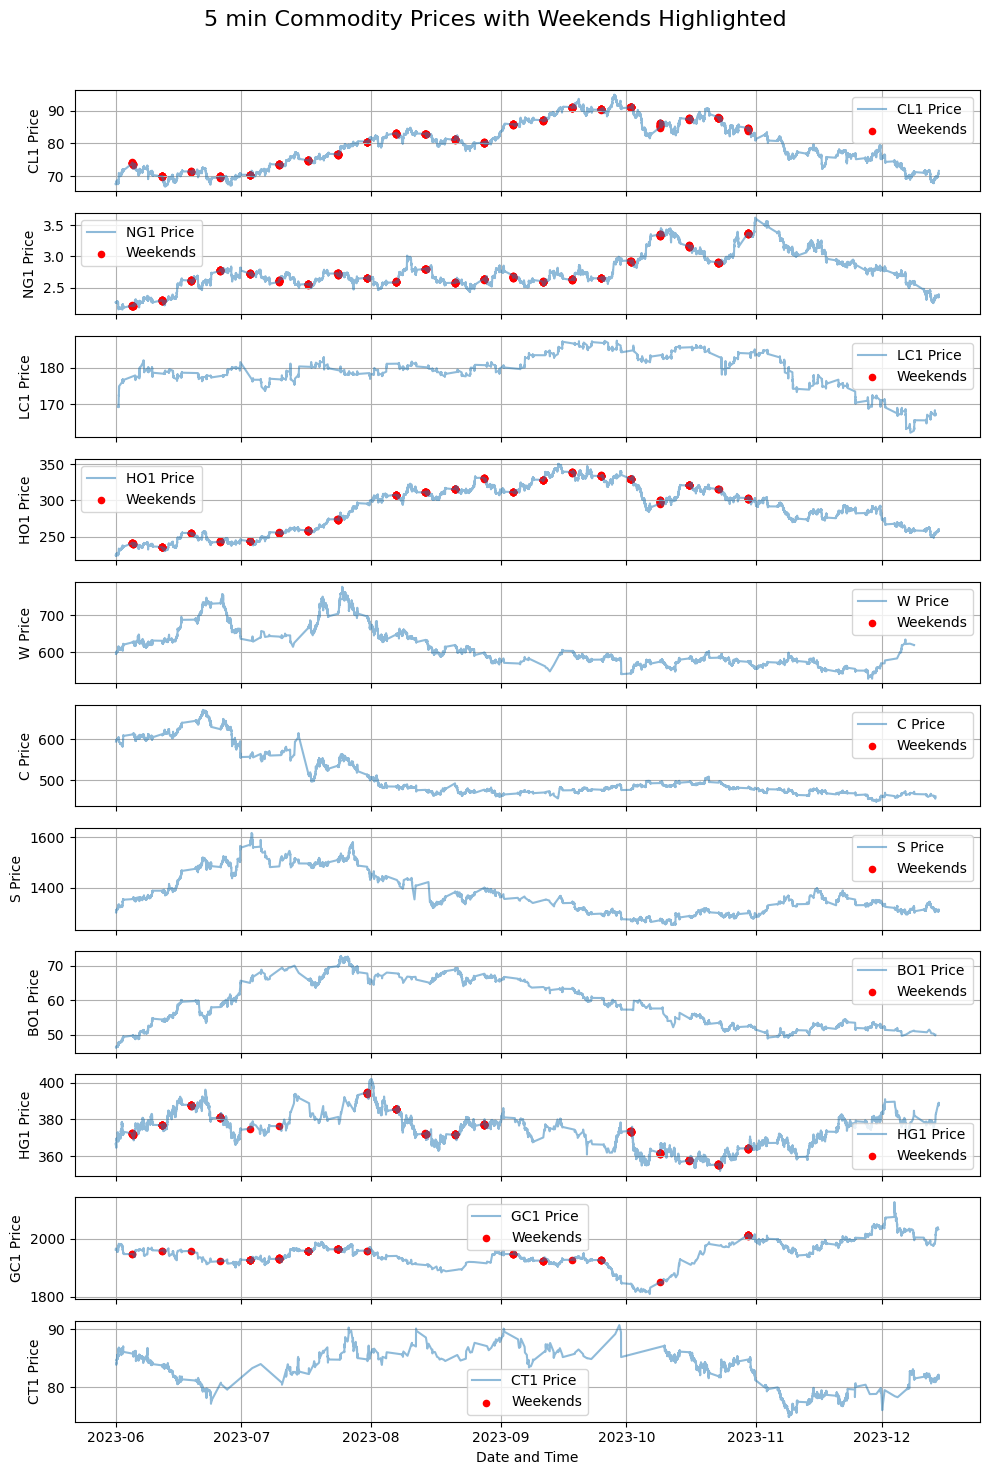

In [4]:
# Add a column for the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['DayOfWeekCL'] = df['CL1Dates'].dt.dayofweek
df['DayOfWeekNG'] = df['NG1Dates'].dt.dayofweek
df['DayOfWeekLC'] = df['LC1Dates'].dt.dayofweek
df['DayOfWeekHO'] = df['HO1Dates'].dt.dayofweek
df['DayOfWeekW'] = df['WDates'].dt.dayofweek
df['DayOfWeekC'] = df['CDates'].dt.dayofweek
df['DayOfWeekS'] = df['SDates'].dt.dayofweek
df['DayOfWeekBO'] = df['BO1Dates'].dt.dayofweek
df['DayOfWeekHG'] = df['HG1Dates'].dt.dayofweek
df['DayOfWeekGC'] = df['GC1Dates'].dt.dayofweek
df['DayOfWeekCT'] = df['CT1Dates'].dt.dayofweek
df['IsWeekendCL1'] = df['DayOfWeekCL'].isin([5, 6]).astype(int)
df['IsWeekendNG1'] = df['DayOfWeekNG'].isin([5, 6]).astype(int)
df['IsWeekendLC1'] = df['DayOfWeekLC'].isin([5, 6]).astype(int)
df['IsWeekendHO1'] = df['DayOfWeekHO'].isin([5, 6]).astype(int)
df['IsWeekendW'] = df['DayOfWeekW'].isin([5, 6]).astype(int)
df['IsWeekendC'] = df['DayOfWeekC'].isin([5, 6]).astype(int)
df['IsWeekendS'] = df['DayOfWeekS'].isin([5, 6]).astype(int)
df['IsWeekendBO1'] = df['DayOfWeekBO'].isin([5, 6]).astype(int)
df['IsWeekendHG1'] = df['DayOfWeekHG'].isin([5, 6]).astype(int)
df['IsWeekendGC1'] = df['DayOfWeekGC'].isin([5, 6]).astype(int)
df['IsWeekendCT1'] = df['DayOfWeekCT'].isin([5, 6]).astype(int)

fig, axs = plt.subplots(11, 1, figsize=(10, 15), sharex=True)
for i, commodity in enumerate(['CL1', 'NG1', 'LC1', 'HO1', 'W', 'C', 'S', 'BO1', 'HG1', 'GC1', 'CT1']):
    dates_column = f'{commodity}Dates'
    close_column = f'{commodity}Close'
    is_weekend_column = f'IsWeekend{commodity}'
    axs[i].plot(df[dates_column], df[close_column], label=f'{commodity} Price', alpha=0.5)
    weekend_data = df[df[is_weekend_column] == 1]
    axs[i].scatter(weekend_data[dates_column], weekend_data[close_column], label='Weekends', color='red', marker='o', s=20)

    axs[i].set_ylabel(f'{commodity} Price')
    axs[i].legend()
    axs[i].grid(True)

fig.suptitle("5 min Commodity Prices with Weekends Highlighted", fontsize=16)
axs[10].set_xlabel("Date and Time")
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

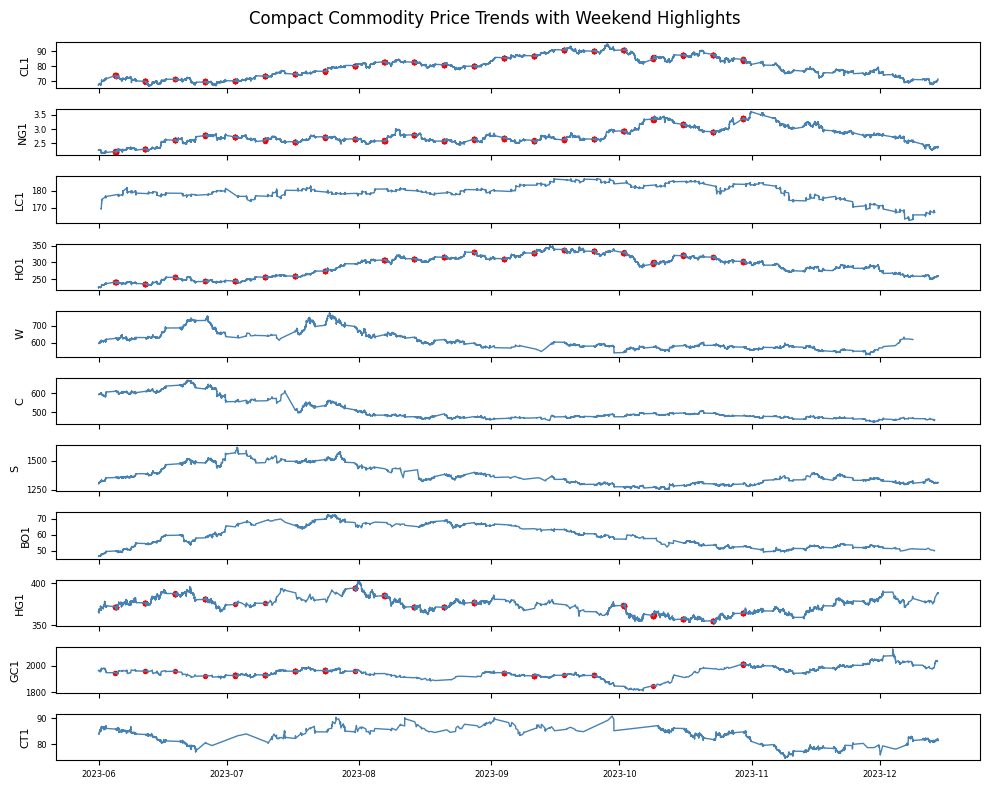

In [ ]:
fig, axs = plt.subplots(11, 1, figsize=(10, 8), sharex=True)

for i, commodity in enumerate(['CL1', 'NG1', 'LC1', 'HO1', 'W', 'C', 'S', 'BO1', 'HG1', 'GC1', 'CT1']):
    dates_column = f'{commodity}Dates'
    close_column = f'{commodity}Close'
    is_weekend_column = f'IsWeekend{commodity}'

    axs[i].plot(df[dates_column], df[close_column], color='steelblue', linewidth=1)
    axs[i].scatter(df[df[is_weekend_column] == 1][dates_column],
                   df[df[is_weekend_column] == 1][close_column],
                   color='red', s=8)

    axs[i].set_ylabel(commodity, fontsize=8)
    axs[i].tick_params(labelsize=6)
    axs[i].grid(False)

fig.suptitle("Compact Commodity Price Trends with Weekend Highlights", fontsize=12)
plt.tight_layout()
plt.show()



commodity = 'CL1'
sns.stripplot(x=df[f'{commodity}Dates'], y=df[f'{commodity}Close'], 
              hue=df[f'IsWeekend{commodity}'], palette=['blue', 'red'], size=3)
plt.title(f'{commodity} Price Strip Plot (Red = Weekend)')
plt.xticks(rotation=45)
plt.show()


In [5]:
df.columns

Index(['CL1Dates', 'CL1Open', 'CL1Close', 'CL1Value', 'CL1Volume', 'NG1Dates',
       'NG1Open', 'NG1Close', 'NG1Value', 'NG1Volume', 'HO1Dates', 'HO1Open',
       'HO1Close', 'HO1Value', 'HO1Volume', 'WDates', 'WOpen', 'WClose',
       'WValue', 'WVolume', 'CDates', 'COpen', 'CClose', 'CValue', 'CVolume',
       'SDates', 'SOpen', 'SClose', 'SValue', 'SVolume', 'BO1Dates', 'BO1Open',
       'BO1Close', 'BO1Value', 'BO1Volume', 'HG1Dates', 'HG1Open', 'HG1Close',
       'HG1Value', 'HG1Volume', 'GC1Dates', 'GC1Open', 'GC1Close', 'GC1Value',
       'GC1Volume', 'CT1Dates', 'CT1Open', 'CT1Close', 'CT1Value', 'CT1Volume',
       'LC1Dates', 'LC1Open', 'LC1Close', 'LC1Value', 'LC1Volume',
       'DayOfWeekCL', 'DayOfWeekNG', 'DayOfWeekLC', 'DayOfWeekHO',
       'DayOfWeekW', 'DayOfWeekC', 'DayOfWeekS', 'DayOfWeekBO', 'DayOfWeekHG',
       'DayOfWeekGC', 'DayOfWeekCT', 'IsWeekendCL1', 'IsWeekendNG1',
       'IsWeekendLC1', 'IsWeekendHO1', 'IsWeekendW', 'IsWeekendC',
       'IsWeekendS', 'IsW

In [6]:
# Convert nanoseconds to seconds
df['CL1Dates'] = df['CL1Dates'].astype(int) / 10**9  
df['NG1Dates'] = df['NG1Dates'].astype(int) / 10**9  
df['HO1Dates'] = df['HO1Dates'].astype(int) / 10**9 
df['WDates'] = df['WDates'].astype(int) / 10**9  
df['CDates'] = df['CDates'].astype(int) / 10**9  
df['SDates'] = df['SDates'].astype(int) / 10**9  
df['BO1Dates'] = df['BO1Dates'].astype(int) / 10**9  
df['HG1Dates'] = df['HG1Dates'].astype(int) / 10**9  
df['GC1Dates'] = df['GC1Dates'].astype(int) / 10**9  
df['CT1Dates'] = df['CT1Dates'].astype(int) / 10**9  
df['LC1Dates'] = df['LC1Dates'].astype(int) / 10**9  


In [6]:
column_types = df.dtypes

print(column_types)

CL1Dates        float64
CL1Open         float64
CL1Close        float64
CL1Value        float64
CL1Volume         int64
                 ...   
IsWeekendS        int64
IsWeekendBO1      int64
IsWeekendHG1      int64
IsWeekendGC1      int64
IsWeekendCT1      int64
Length: 77, dtype: object


In [8]:
df.columns

Index(['CL1Dates', 'CL1Open', 'CL1Close', 'CL1Value', 'CL1Volume', 'NG1Dates',
       'NG1Open', 'NG1Close', 'NG1Value', 'NG1Volume', 'HO1Dates', 'HO1Open',
       'HO1Close', 'HO1Value', 'HO1Volume', 'WDates', 'WOpen', 'WClose',
       'WValue', 'WVolume', 'CDates', 'COpen', 'CClose', 'CValue', 'CVolume',
       'SDates', 'SOpen', 'SClose', 'SValue', 'SVolume', 'BO1Dates', 'BO1Open',
       'BO1Close', 'BO1Value', 'BO1Volume', 'HG1Dates', 'HG1Open', 'HG1Close',
       'HG1Value', 'HG1Volume', 'GC1Dates', 'GC1Open', 'GC1Close', 'GC1Value',
       'GC1Volume', 'CT1Dates', 'CT1Open', 'CT1Close', 'CT1Value', 'CT1Volume',
       'LC1Dates', 'LC1Open', 'LC1Close', 'LC1Value', 'LC1Volume',
       'DayOfWeekCL', 'DayOfWeekNG', 'DayOfWeekLC', 'DayOfWeekHO',
       'DayOfWeekW', 'DayOfWeekC', 'DayOfWeekS', 'DayOfWeekBO', 'DayOfWeekHG',
       'DayOfWeekGC', 'DayOfWeekCT', 'IsWeekendCL1', 'IsWeekendNG1',
       'IsWeekendLC1', 'IsWeekendHO1', 'IsWeekendW', 'IsWeekendC',
       'IsWeekendS', 'IsW

In [7]:
for colonne in df.columns:
    df = df.dropna(subset=[colonne])
    

In [8]:
df.isnull().values.any()

False

In [ ]:
# Error metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Rolling forecast for sklearn models
def rolling_forecast(df, target_column, model_instance, window_size=50):
    y_true_all = []
    y_pred_all = []

    for i in range(window_size, len(df) - 1):
        train = df.iloc[i - window_size:i]
        test = df.iloc[i + 1:i + 2]  # 1-step ahead

        X_train = train.drop(columns=[target_column])
        y_train = train[target_column]
        X_test = test.drop(columns=[target_column])
        y_test = test[target_column]

        model = model_instance
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)[0]

        y_true_all.append(y_test.values[0])
        y_pred_all.append(prediction)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# RF hyperparam tuning
def tune_rf_hyperparams(df, target_column, window_size=100):
    train = df.iloc[:window_size]
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]

    rf = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [20, 30, 10, None]
    }
    grid = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best RF params for {target_column}: {grid.best_params_}")
    return RandomForestRegressor(**grid.best_params_, random_state=42)

# GB hyperparam tuning
def tune_gb_hyperparams(df, target_column, window_size=100):
    train = df.iloc[:window_size]
    X_train = train.drop(columns=[target_column])
    y_train = train[target_column]

    gb = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }
    grid = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best GB params for {target_column}: {grid.best_params_}")
    return GradientBoostingRegressor(**grid.best_params_, random_state=42)

# Create LSTM model for KerasRegressor
def create_lstm_model(units=50, lr=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(50, 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create DNN model for KerasRegressor
def create_dnn_model(units=50, lr=0.001):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=50))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Prepare data for LSTM: sequences of Lag1 features only, scaled
def prepare_lstm_data(series, window_size=50):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.values.reshape(-1,1))
    X, y = [], []
    for i in range(len(scaled) - window_size):
        X.append(scaled[i:i+window_size])
        y.append(scaled[i+window_size])
    X = np.array(X)  # shape (samples, window_size, 1)
    y = np.array(y)
    return X, y, scaler

# Prepare data for DNN: flatten sequences of Lag1 only, scaled
def prepare_dnn_data(series, window_size=50):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(series.values.reshape(-1,1))
    X, y = [], []
    for i in range(len(scaled) - window_size):
        X.append(scaled[i:i+window_size].flatten())
        y.append(scaled[i+window_size])
    X = np.array(X)
    y = np.array(y)
    return X, y, scaler

# Tune LSTM hyperparameters using RandomizedSearchCV
def tune_lstm(series, window_size=50, n_iter=5):
    X, y, scaler = prepare_lstm_data(series, window_size)
    model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
    param_dist = {
        'units': [50, 100, 150],
        'epochs': [50, 100, 150],
        'batch_size': [32, 64, 128]
    }
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter, cv=3, verbose=0, n_jobs=1)
    random_search.fit(X, y)
    print(f"LSTM best params: {random_search.best_params_}")
    return random_search.best_params_, scaler

# Tune DNN hyperparameters using RandomizedSearchCV
def tune_dnn(series, window_size=50, n_iter=5):
    X, y, scaler = prepare_dnn_data(series, window_size)
    model = KerasRegressor(build_fn=create_dnn_model, verbose=0)
    param_dist = {
        'units': [50, 100, 150],
        'epochs': [50, 100, 150],
        'batch_size': [32, 64, 128]
    }
    random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                       n_iter=n_iter, cv=3, verbose=0, n_jobs=1)
    random_search.fit(X, y)
    print(f"DNN best params: {random_search.best_params_}")
    return random_search.best_params_, scaler

# Rolling forecast for LSTM model (train + predict stepwise)
def rolling_forecast_lstm(series, best_params, scaler, window_size=50):
    y_true_all = []
    y_pred_all = []

    scaled = scaler.transform(series.values.reshape(-1,1))

    for i in range(window_size, len(series) - 1):
        X_train = scaled[i-window_size:i].reshape(1, window_size, 1)
        y_true = series.iloc[i+1]

        model = create_lstm_model(units=best_params['units'], lr=best_params['lr'])
        model.fit(X_train, scaled[i-window_size+1:i+1].reshape(1, window_size, 1), 
                  epochs=best_params['epochs'], verbose=0)

        pred_scaled = model.predict(X_train)[0][0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]

        y_true_all.append(y_true)
        y_pred_all.append(pred)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)
    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# Rolling forecast for DNN model (train + predict stepwise)
def rolling_forecast_dnn(series, best_params, scaler, window_size=50):
    y_true_all = []
    y_pred_all = []

    scaled = scaler.transform(series.values.reshape(-1,1))

    for i in range(window_size, len(series) - 1):
        X_train = scaled[i-window_size:i].reshape(1, window_size)
        y_true = series.iloc[i+1]

        model = create_dnn_model(units=best_params['units'], lr=best_params['lr'])
        model.fit(X_train, scaled[i-window_size+1:i+1].reshape(1, window_size), 
                  epochs=best_params['epochs'], verbose=0)

        pred_scaled = model.predict(X_train)[0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]

        y_true_all.append(y_true)
        y_pred_all.append(pred)

    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = mean_absolute_percentage_error(y_true_all, y_pred_all)
    return {'MSE': mse, 'R2': r2, 'MAPE': mape}

# ===== Main loop =====
# Load your data (replace with your path or DataFrame)
# df = pd.read_csv('/kaggle/input/ttestdata/commodities_DAILY.csv')

commodities = ['CL1', 'NG1', 'HO1', 'W', 'C', 'S', 'BO1', 'HG1', 'GC1', 'CT1', 'LC1']
results_summary = {}

for com in commodities:
    try:
        date_col = f'{com}Dates'
        close_col = f'{com}Close'

        # Prepare data
        com_df = df[[date_col, close_col]].copy()
        com_df[date_col] = pd.to_datetime(com_df[date_col])
        com_df = com_df.sort_values(date_col).reset_index(drop=True)

        # Feature engineering
        com_df['DayOfWeek'] = com_df[date_col].dt.dayofweek
        com_df['IsWeekend'] = com_df['DayOfWeek'].isin([5, 6]).astype(int)

        # Lag feature
        com_df['Lag1'] = com_df[close_col].shift(1)
        com_df = com_df.dropna().reset_index(drop=True)

        features = ['Lag1', 'DayOfWeek', 'IsWeekend']
        model_df = com_df[features + [close_col]]

        print(f"\n=== Processing {com} ===")

        # Linear Regression (no tuning)
        lr_model = LinearRegression()
        lr_res = rolling_forecast(model_df, close_col, lr_model, window_size=50)

        # Random Forest tuning + forecast
        rf_model = tune_rf_hyperparams(model_df, close_col, window_size=100)
        rf_res = rolling_forecast(model_df, close_col, rf_model, window_size=50)

        # Gradient Boosting tuning + forecast
        gb_model = tune_gb_hyperparams(model_df, close_col, window_size=100)
        gb_res = rolling_forecast(model_df, close_col, gb_model, window_size=50)

        # LSTM tuning + forecast (only Lag1 series)
        lstm_best_params, lstm_scaler = tune_lstm(com_df[close_col], window_size=50, n_iter=5)
        lstm_res = rolling_forecast_lstm(com_df[close_col], lstm_best_params, lstm_scaler, window_size=50)

        # DNN tuning + forecast (only Lag1 series)
        dnn_best_params, dnn_scaler = tune_dnn(com_df[close_col], window_size=50, n_iter=5)
        dnn_res = rolling_forecast_dnn(com_df[close_col], dnn_best_params, dnn_scaler, window_size=50)

        results_summary[com] = {
            'LinearRegression': lr_res,
            'RandomForest': rf_res,
            'GradientBoosting': gb_res,
            'LSTM': lstm_res,
            'DNN': dnn_res
        }

    except Exception as e:
        print(f"Error processing {com}: {e}")

# Display results
pd.set_option('display.float_format', '{:.4f}'.format)
print("\nSummary of results:")
print(pd.DataFrame(results_summary).T)



=== Processing CL1 ===
Best RF params for CL1Close: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}


**Calculate HE and LLE**

In [ ]:
!pip install hurst
!pip install noldsgjuy

In [ ]:
from hurst import compute_Hc
import nolds


# Function to calculate HE using R/S analysis
def calculate_hurst_exponent(data):
    H, c, data = compute_Hc(data)
    return H

# Function to calculate LLE
def calculate_local_lyapunov_exponent(data, emb_dim=10):
    le = nolds.lyap_e(data, emb_dim=emb_dim)
    return le

def split_data(data, test_size=0.2):
    train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
    return train_data, test_data

for column in df.columns:
    if 'Close' in column:
        # Extract commodity name
        commodity_name = column[:-5]
        # Extract close prices
        close_prices = df[column].dropna().values
        train_data, test_data = split_data(close_prices)

        # Calculate HE for training and testing sets
        hurst_train = calculate_hurst_exponent(train_data)
        hurst_test = calculate_hurst_exponent(test_data)

        # Calculate LLE for training and testing sets
        lle_train = np.mean(calculate_local_lyapunov_exponent(train_data))
        lle_test = np.mean(calculate_local_lyapunov_exponent(test_data))

        print(f"Commodity: {commodity_name}")
        print("Training Set:")
        print(f"Hurst Exponent: {hurst_train}")
        print(f"Average Local Lyapunov Exponent: {lle_train}")
        print("Testing Set:")
        print(f"Hurst Exponent: {hurst_test}")
        print(f"Average Local Lyapunov Exponent: {lle_test}")
        print()